In [1]:
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
load_dotenv()

False

In [2]:
cities=["Atlanta","Detroit", "Tampa", "Las Vegas", "Miami", "New Orleans", "Washington", "Baltimore", "Portland", "San Francisco"]

In [3]:
house_values_df = pd.read_csv("house_values_zillow.csv")
hv_filtered = house_values_df[["RegionName", "StateName", "Metro","2012-01-31","2013-01-31","2014-01-31","2015-01-31","2016-01-31","2017-01-31","2018-01-31","2019-01-31","2020-01-31","2021-01-31","2022-01-31"]] #only the columns I want

states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]
metro = ["Las Vegas-Henderson-Paradise, NV", "San Francisco-Oakland-Berkeley, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Portland-Vancouver-Hillsboro, OR-WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV", "Detroit-Warren-Dearborn, MI", "Baltimore-Columbia-Towson, MD", "Atlanta-Sandy Springs-Alpharetta, GA", "Tampa-St. Petersburg-Clearwater, FL", "New Orleans-Metairie, LA"]
years = np.arange(2012,2022,1)
filtered_states_df = hv_filtered[hv_filtered.isin(states).any(axis=1)]
filtered_cities_df = filtered_states_df[filtered_states_df.isin(cities).any(axis=1)]
filtered_metro_df = filtered_cities_df[filtered_cities_df.isin(metro).any(axis=1)]
# filtered_hv_21_22_df.head(10)
filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
filtered_metro_df['2014-01-31'] = filtered_metro_df['2014-01-31'].fillna(0)
filtered_metro_df['2015-01-31'] = filtered_metro_df['2015-01-31'].fillna(0)
filtered_metro_df['2016-01-31'] = filtered_metro_df['2016-01-31'].fillna(0)
filtered_metro_df['2017-01-31'] = filtered_metro_df['2017-01-31'].fillna(0)
filtered_metro_df['2018-01-31'] = filtered_metro_df['2018-01-31'].fillna(0)
filtered_metro_df['2019-01-31'] = filtered_metro_df['2019-01-31'].fillna(0)
filtered_metro_df['2020-01-31'] = filtered_metro_df['2020-01-31'].fillna(0)
filtered_metro_df['2021-01-31'] = filtered_metro_df['2021-01-31'].fillna(0)
filtered_metro_df['2022-01-31'] = filtered_metro_df['2022-01-31'].fillna(0)
# filtered_hv_21_22_df.head(50)
filtered_metro_df['2012-01-31'] = round(filtered_metro_df['2012-01-31'], 2)
filtered_metro_df['2013-01-31'] = round(filtered_metro_df['2013-01-31'], 2)
filtered_metro_df['2014-01-31'] = round(filtered_metro_df['2014-01-31'], 2)
filtered_metro_df['2015-01-31'] = round(filtered_metro_df['2015-01-31'], 2)
filtered_metro_df['2016-01-31'] = round(filtered_metro_df['2016-01-31'], 2)
filtered_metro_df['2017-01-31'] = round(filtered_metro_df['2017-01-31'], 2)
filtered_metro_df['2018-01-31'] = round(filtered_metro_df['2018-01-31'], 2)
filtered_metro_df['2019-01-31'] = round(filtered_metro_df['2019-01-31'], 2)
filtered_metro_df['2020-01-31'] = round(filtered_metro_df['2020-01-31'], 2)
filtered_metro_df['2021-01-31'] = round(filtered_metro_df['2021-01-31'], 2)
filtered_metro_df['2022-01-31'] = round(filtered_metro_df['2022-01-31'], 2)
filtered_metro_df = filtered_metro_df.rename(columns={"RegionName":"Year"})
for i in range(2012,2023):
    filtered_metro_df = filtered_metro_df.rename(columns={f"{i}-01-31":f"{i}"})
real_estate_prices = filtered_metro_df.set_index("Year")
real_estate_prices.head(20)



C:\Users\puckr\AppData\Local\Temp\ipykernel_11052\50528981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
C:\Users\puckr\AppData\Local\Temp\ipykernel_11052\50528981.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
C:\Users\puckr\AppData\Local\Temp\ipykernel_11052\50528981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,StateName,Metro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,
Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,CA,"San Francisco-Oakland-Berkeley, CA",615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,OR,"Portland-Vancouver-Hillsboro, OR-WA",241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,DC,"Washington-Arlington-Alexandria, DC-VA-MD-WV",359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,MI,"Detroit-Warren-Dearborn, MI",18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,MD,"Baltimore-Columbia-Towson, MD",82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,GA,"Atlanta-Sandy Springs-Alpharetta, GA",129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,FL,"Tampa-St. Petersburg-Clearwater, FL",94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [4]:
real_estate_prices = real_estate_prices.drop(real_estate_prices.columns[0:2], axis=1)
real_estate_prices.head(20)

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,
Las Vegas,116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [5]:
real_estate_prices = real_estate_prices.transpose()
real_estate_prices

Year,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Washington
2012,116934.02,615246.15,176634.14,241196.14,359139.04,18268.31,82727.12,129823.45,94281.68,133398.32,194433.05
2013,132081.22,738878.23,198546.61,262656.43,390497.70,18558.24,88046.07,137038.97,105523.51,151844.94,215344.61
2014,172615.98,856989.05,243519.36,294454.36,438557.80,21539.87,100469.70,164578.79,125687.16,169244.27,239084.18
2015,186985.34,996609.03,270890.51,321556.13,469496.04,24639.40,102555.31,187047.11,139028.21,164669.67,255482.93
2016,202048.00,1153086.87,299043.90,376282.19,499357.15,28344.16,106097.47,212547.31,157266.05,188042.57,274226.33
2017,213888.35,1145789.14,312017.37,422003.08,518851.06,30799.03,110515.43,237702.12,179400.84,195911.78,290371.11
2018,247569.68,1254291.74,324711.58,438346.34,538924.71,35183.51,116700.62,267426.54,198929.01,193453.83,301436.79
2019,280512.33,1306153.19,335967.65,437420.14,565816.32,42025.86,126707.41,297186.94,214526.43,199919.76,307323.98
2020,286778.62,1330689.65,347039.40,445584.98,577273.60,46631.19,137095.08,305776.44,227796.30,223361.01,317628.31
2021,305781.91,1347232.32,369467.39,486544.44,615740.57,57106.31,148247.53,325108.90,255955.56,237387.08,339252.69


In [6]:
scaler = StandardScaler()
scaled_real_estate_prices = scaler.fit_transform(real_estate_prices)
scaled_real_estate_prices_df = scaled_df = pd.DataFrame(scaled_real_estate_prices, columns=real_estate_prices.columns)
print(real_estate_prices)
print(scaled_real_estate_prices_df)

Year  Las Vegas  San Francisco      Miami   Portland  Washington   Detroit  \
2012  116934.02      615246.15  176634.14  241196.14   359139.04  18268.31   
2013  132081.22      738878.23  198546.61  262656.43   390497.70  18558.24   
2014  172615.98      856989.05  243519.36  294454.36   438557.80  21539.87   
2015  186985.34      996609.03  270890.51  321556.13   469496.04  24639.40   
2016  202048.00     1153086.87  299043.90  376282.19   499357.15  28344.16   
2017  213888.35     1145789.14  312017.37  422003.08   518851.06  30799.03   
2018  247569.68     1254291.74  324711.58  438346.34   538924.71  35183.51   
2019  280512.33     1306153.19  335967.65  437420.14   565816.32  42025.86   
2020  286778.62     1330689.65  347039.40  445584.98   577273.60  46631.19   
2021  305781.91     1347232.32  369467.39  486544.44   615740.57  57106.31   
2022  378531.44     1437822.96  430181.47  540430.84   631401.93  68524.97   

Year  Baltimore    Atlanta      Tampa  New Orleans  Washington 

In [7]:
#read in crime data and create data frame

crime_by_city_data = pd.read_csv("us_crime_data_by_city - Sheet1.csv")


In [19]:
crime_data = crime_by_city_data[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland ','Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans']]
#renaming columns so there is no conflict when the data is concat'd with the real estate price data frame
crime_data = crime_data.rename(columns={'Las Vegas' : 'Las Vegas Crime', 'San Francisco' : 'San Francisco Crime', 'Miami' : 'Miami Crime', 'Portland ' : 'Portland Crime', 'Washington' : 'Washington Crime', 'Detroit' : 'Detroit Crime', 'Baltimore' : 'Baltimore Crime', 'Atlanta' : 'Atlanta Crime', 'Tampa' : 'Tampa Crime', 'New Orleans' : 'New Orleans Crime'})
crime_data

,Year,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
0,2012,0.039295,0.054584,0.065580,0.056308,0.058098,0.079548,0.060848,0.079125,0.034642,0.045875
1,2013,0.039635,0.066559,0.061945,0.053614,0.579240,0.079505,0.063681,0.073346,0.029319,0.046390
2,2014,0.037691,0.061125,0.058993,0.057616,0.061978,0.068416,0.060741,0.069831,0.030162,0.052057
3,2015,0.046048,0.069306,0.053991,0.056840,0.057187,0.059158,0.065373,0.066243,0.029340,0.048284
4,2016,0.037100,0.061493,0.051151,0.056635,0.057999,0.068111,0.065795,0.063376,0.025770,0.049985
5,2017,0.035651,0.069002,0.047479,0.062160,0.049609,0.066621,0.069764,0.057198,0.022249,0.053704
6,2018,0.034459,0.062581,0.041947,0.059797,0.052112,0.063956,0.063402,0.054323,0.020843,0.057204
7,2019,0.033065,0.061908,0.042648,0.057670,0.052230,0.063277,0.061789,0.048985,0.020384,0.064373
8,2020,0.027382,0.049598,0.033054,0.052616,0.043892,0.053892,0.059279,0.048653,0.018854,0.058639
9,2021,0.030117,0.056678,0.036600,0.062970,0.044547,0.055092,0.055909,0.045586,0.000000,0.000000


In [9]:
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data)
scaled_crime_data_df = scaled_df = pd.DataFrame(scaled_crime_data, columns=crime_data.columns)
print(crime_data)
print(scaled_crime_data_df)

    Year  Las Vegas Crime  San Francisco Crime  Miami Crime  Portland Crime  \
0   2012         0.039295             0.054584     0.065580        0.056308   
1   2013         0.039635             0.066559     0.061945        0.053614   
2   2014         0.037691             0.061125     0.058993        0.057616   
3   2015         0.046048             0.069306     0.053991        0.056840   
4   2016         0.037100             0.061493     0.051151        0.056635   
5   2017         0.035651             0.069002     0.047479        0.062160   
6   2018         0.034459             0.062581     0.041947        0.059797   
7   2019         0.033065             0.061908     0.042648        0.057670   
8   2020         0.027382             0.049598     0.033054        0.052616   
9   2021         0.030117             0.056678     0.036600        0.062970   
10  2022         0.034338             0.069416     0.038706        0.070755   

    Washington Crime  Detroit Crime  Baltimore Crim

In [20]:
#concat the crime data to the real estate data 
scaled_real_estate_prices_df.reset_index(drop=True, inplace=True)
scaled_crime_data_df.reset_index(drop=True, inplace=True)
crime_vs_real_estate = pd.concat([scaled_real_estate_prices_df, scaled_crime_data_df], axis=1, join='inner')
#adding the year column back in 
years = list(range(2012,2023))
crime_vs_real_estate['Year'] = years
#reordering columns to make years first
crime_vs_real_estate = crime_vs_real_estate[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland', 'Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans', 'Las Vegas Crime', 'San Francisco Crime', 'Miami Crime', 'Portland Crime', 'Washington Crime','Detroit Crime', 'Baltimore Crime', 'Atlanta Crime', 'Tampa Crime', 'New Orleans Crime']]
crime_vs_real_estate.set_index('Year', inplace=True)
crime_vs_real_estate




,Las Vegas,San Francisco,Miami,Portland,Washington,Washington,Detroit,Baltimore,Atlanta,Tampa,...,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
Year,,,,,,,,,,,,,,,,,,,,,
2012,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.667159,-1.107596,-1.398164,-1.435864,-1.381188,...,0.712028,-1.208660,1.665677,-0.520894,-0.275726,1.736091,-0.093441,1.766050,1.326157,-0.180561
2013,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.277656,-1.089070,-1.180245,-1.341210,-1.205876,...,0.783063,0.737130,1.313847,-1.080223,3.159647,1.730684,0.430778,1.250626,0.714380,-0.149343
2014,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.835478,-0.898547,-0.671244,-0.979939,-0.891431,...,0.376599,-0.145802,1.028120,-0.249245,-0.250151,0.341076,-0.113377,0.937123,0.811289,0.194560
2015,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.530031,-0.700491,-0.585796,-0.685197,-0.683383,...,2.123658,1.183324,0.543913,-0.410345,-0.281731,-0.819127,0.743772,0.617196,0.716851,-0.034433
2016,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.180913,-0.463761,-0.440672,-0.350682,-0.398970,...,0.253097,-0.086144,0.269024,-0.452900,-0.276383,0.302840,0.821848,0.361433,0.306581,0.068826
2017,-0.206277,0.148104,0.158808,0.371392,0.110186,0.119803,-0.306898,-0.259667,-0.020698,-0.053787,...,-0.049819,1.134009,-0.086511,0.694327,-0.331691,0.116075,1.556310,-0.189488,-0.098067,0.294495
2018,0.240767,0.568084,0.337394,0.549173,0.348004,0.325914,-0.026734,-0.006258,0.369231,0.250748,...,-0.299021,0.090684,-0.621940,0.203553,-0.315192,-0.217844,0.379141,-0.445913,-0.259648,0.506855
2019,0.678008,0.768824,0.495748,0.539098,0.666596,0.435570,0.410484,0.403724,0.759631,0.493983,...,-0.590280,-0.018712,-0.554120,-0.238049,-0.314413,-0.302906,0.080694,-0.922008,-0.312297,0.941910
2020,0.761179,0.863797,0.651508,0.627914,0.802333,0.627501,0.704759,0.829311,0.872310,0.700922,...,-1.778295,-2.018705,-1.482810,-1.287456,-0.369374,-1.479022,-0.383884,-0.951567,-0.488224,0.593991


In [11]:
#delete the row of year 2021
#crime_vs_real_estate = crime_vs_real_estate.drop('2021', axis=0)

In [12]:
#creating datasets for each of the three .corr models
#crime_vs_real_estate_pearson = crime_vs_real_estate.corr(method='pearson')
#crime_vs_real_estate_spearman = crime_vs_real_estate.corr(method='spearman')
#crime_vs_real_estate_kendall = crime_vs_real_estate.corr(method='kendall')

In [13]:
#sns.heatmap(crime_vs_real_estate_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0)
#plt.title('Pearson Correlation National Crime and Real Estate Prices')
#plt.show()

In [21]:
pearson_correlation_matrix = crime_vs_real_estate.corr()
pearson_correlation_matrix

,Las Vegas,San Francisco,Miami,Portland,Washington,Washington,Detroit,Baltimore,Atlanta,Tampa,...,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
Las Vegas,1.000000,0.941200,0.980067,0.966510,0.971284,0.988056,0.975377,0.988411,0.989096,0.993914,...,-0.666136,0.005706,-0.909718,0.663745,-0.440607,-0.695002,-0.665056,-0.951759,-0.679031,-0.009179
San Francisco,0.941200,1.000000,0.974457,0.972534,0.985326,0.957928,0.871188,0.903383,0.961585,0.928312,...,-0.673439,0.005528,-0.959841,0.524054,-0.480164,-0.786760,-0.395116,-0.976424,-0.723032,0.013145
Miami,0.980067,0.974457,1.000000,0.986173,0.986480,0.995611,0.935677,0.959902,0.976893,0.975788,...,-0.626079,0.082478,-0.920831,0.674214,-0.485006,-0.732236,-0.536632,-0.957054,-0.687268,-0.007530
Portland,0.966510,0.972534,0.986173,1.000000,0.983418,0.986556,0.929882,0.943136,0.982866,0.973647,...,-0.690901,0.044060,-0.936120,0.671019,-0.462855,-0.695191,-0.496571,-0.970686,-0.734160,-0.035944
Washington,0.971284,0.985326,0.986480,0.983418,1.000000,0.980337,0.928690,0.953990,0.984150,0.965501,...,-0.694951,-0.013487,-0.958728,0.593634,-0.477059,-0.791539,-0.500144,-0.987368,-0.778281,-0.089840
Washington,0.988056,0.957928,0.995611,0.986556,0.980337,1.000000,0.958366,0.975183,0.981928,0.989834,...,-0.638760,0.084031,-0.912457,0.701984,-0.436176,-0.695619,-0.589986,-0.953269,-0.693843,-0.028569
Detroit,0.975377,0.871188,0.935677,0.929882,0.928690,0.958366,1.000000,0.991337,0.962939,0.986297,...,-0.672503,-0.051724,-0.860809,0.695556,-0.378677,-0.624520,-0.759526,-0.903962,-0.712206,-0.150940
Baltimore,0.988411,0.903383,0.959902,0.943136,0.953990,0.975183,0.991337,1.000000,0.972454,0.990220,...,-0.675861,-0.036474,-0.890205,0.671683,-0.406557,-0.690852,-0.724679,-0.927663,-0.712849,-0.114449
Atlanta,0.989096,0.961585,0.976893,0.982866,0.984150,0.981928,0.962939,0.972454,1.000000,0.988000,...,-0.727287,-0.055257,-0.948329,0.617221,-0.457189,-0.720530,-0.591123,-0.979336,-0.736998,-0.038788
Tampa,0.993914,0.928312,0.975788,0.973647,0.965501,0.989834,0.986297,0.990220,0.988000,1.000000,...,-0.678158,0.010999,-0.903851,0.701058,-0.415088,-0.661146,-0.671874,-0.945529,-0.703425,-0.059758


In [22]:
for city in cities:
    city_crime_pearson = pearson_correlation_matrix.loc[city, f'{city} Crime']
    print(f'The Pearson coefficient between crime and real estate prices for {city} is {city_crime_pearson}')

The Pearson coefficient between crime and real estate prices for Atlanta is -0.9793355193305607
The Pearson coefficient between crime and real estate prices for Detroit is -0.6245203714462518
The Pearson coefficient between crime and real estate prices for Tampa is -0.7034252145868229
The Pearson coefficient between crime and real estate prices for Las Vegas is -0.6661363040809835
The Pearson coefficient between crime and real estate prices for Miami is -0.9208309826121667
The Pearson coefficient between crime and real estate prices for New Orleans is -0.10925304597888784
The Pearson coefficient between crime and real estate prices for Washington is Washington   -0.477059
Washington   -0.436176
Name: Washington Crime, dtype: float64
The Pearson coefficient between crime and real estate prices for Baltimore is -0.7246793918810064
The Pearson coefficient between crime and real estate prices for Portland is 0.6710185512367071
The Pearson coefficient between crime and real estate prices fo

In [16]:
crime_vs_real_estate.index


Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='Year')

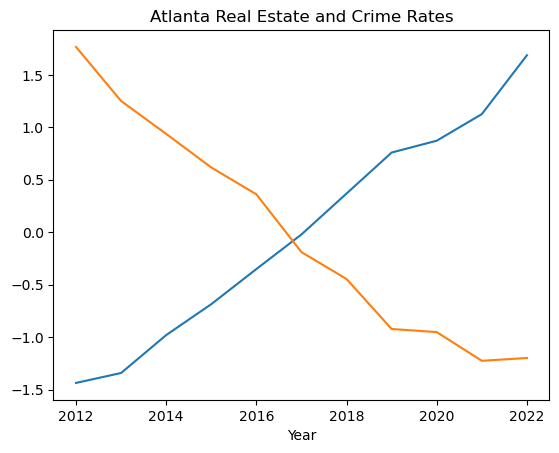

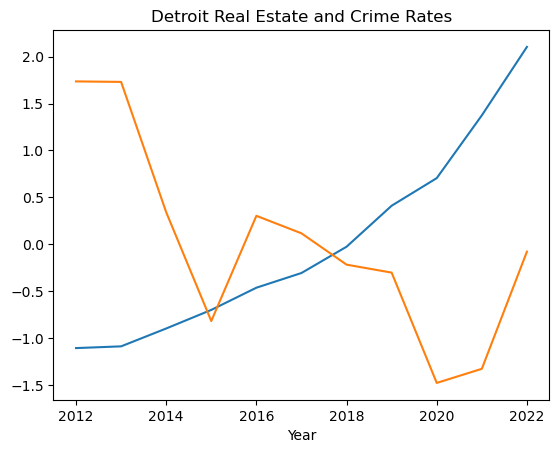

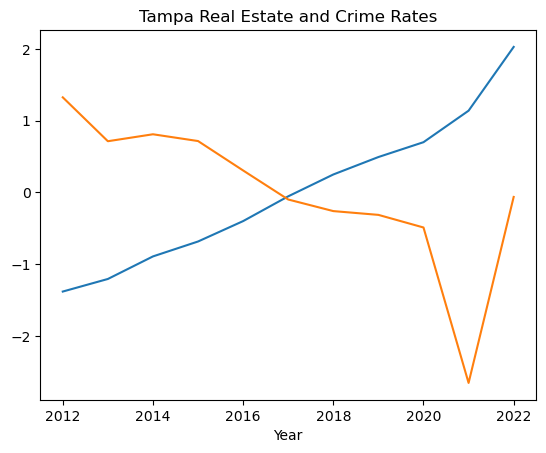

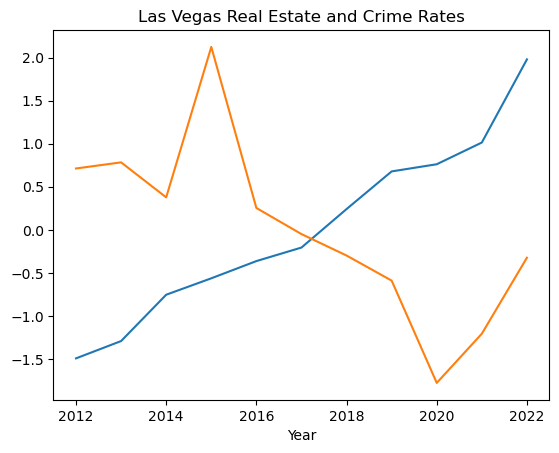

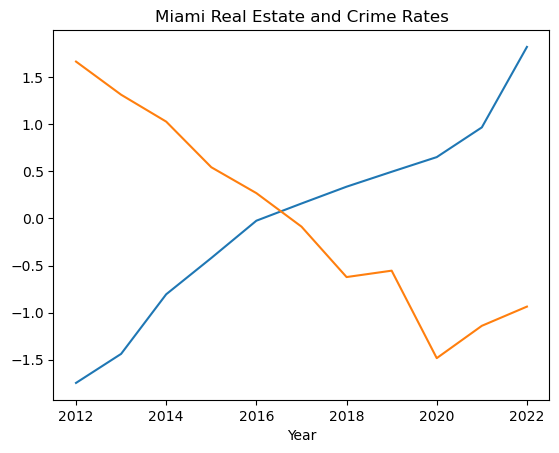

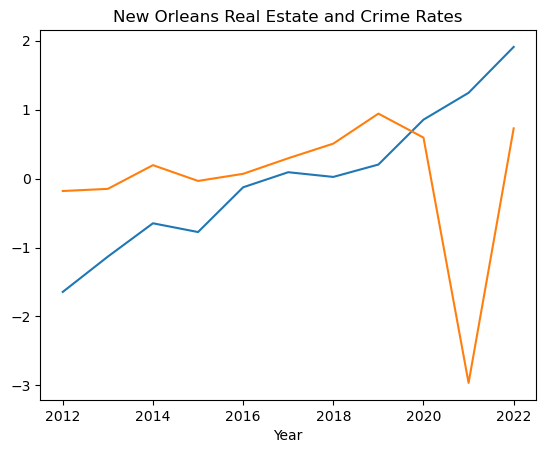

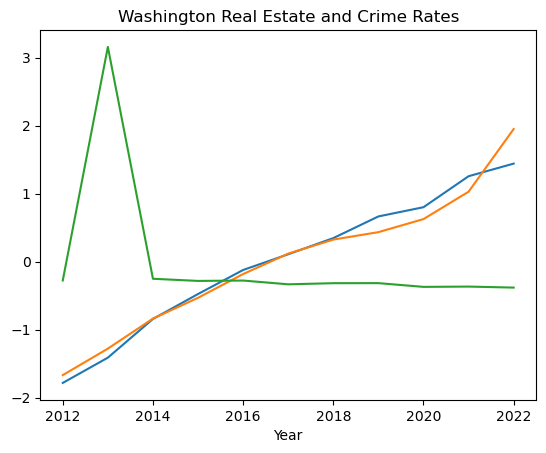

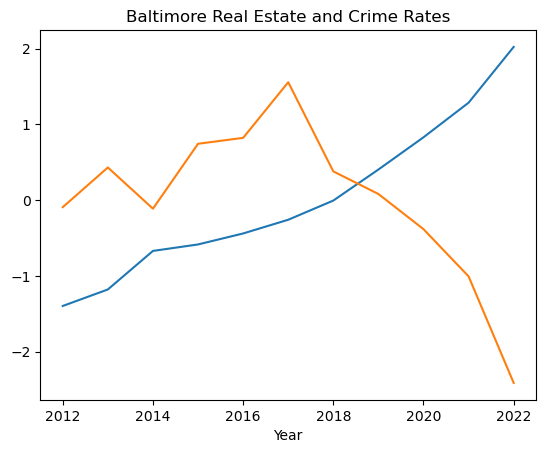

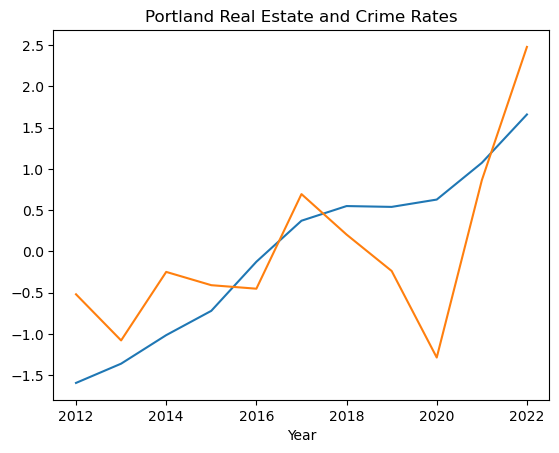

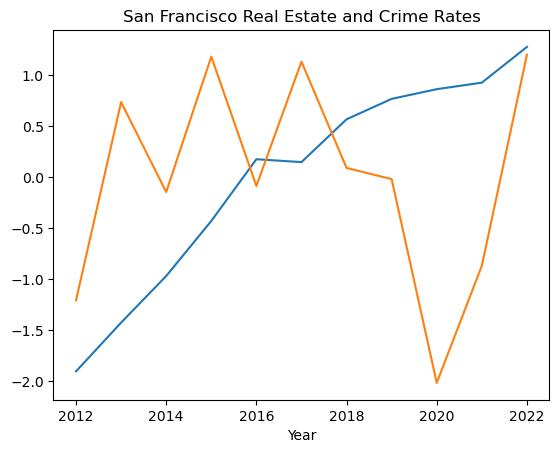

In [23]:
#create line graph for each city
for city in cities:
    #create a graph for each city with the year, real estate price and crime number          
    plt.plot(crime_vs_real_estate.index, crime_vs_real_estate[city], label = "Real Estate Prices")
    plt.plot(crime_vs_real_estate.index, crime_vs_real_estate[f'{city} Crime'], label = "Crime Rate")
    #format the plot
    plt.legend
    plt.title(f'{city} Real Estate and Crime Rates')
    plt.xlabel('Year')
    plt.show()

In [18]:
#create data frame to correlate population changes to real estate prices
population_data = crime_by_city_data[['Year', 'Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop', 'Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']]
population_data

,Year,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
0,2012,1479393,820363,414327,598037,632323,707096,625474,437041,350758,362874
1,2013,1500455,833863,418394,609136,646449,699889,622671,451020,351314,377022
2,2014,1530899,850294,421996,615672,658893,684694,623513,454363,357124,387113
3,2015,1562134,863782,437969,631945,672228,673225,621252,464710,364383,393447
4,2016,1592178,871155,449469,642129,681170,669673,618385,472579,375904,397208
5,2017,1627244,881255,463009,649408,693972,670792,613217,481343,384360,397447
6,2018,1644390,889282,473047,657260,702455,671275,605436,496106,392945,396374
7,2019,1666803,886007,480505,662114,705749,663502,597239,507301,400501,394498
8,2020,1693061,881514,476102,662941,712816,659616,583132,499586,407350,393779
9,2021,1685021,815201,439890,664350,670050,673708,576498,521274,387050,376971


In [24]:
scaler = StandardScaler()
scaled_population_data = scaler.fit_transform(population_data)
scaled_population_data_df = scaled_df = pd.DataFrame(scaled_population_data, columns=population_data.columns)
print(population_data)
print(scaled_population_data_df)

    Year  Las Vegas Pop  San Fran Pop  Miami Pop  Portland Pop  Wash Pop  \
0   2012        1479393        820363     414327        598037    632323   
1   2013        1500455        833863     418394        609136    646449   
2   2014        1530899        850294     421996        615672    658893   
3   2015        1562134        863782     437969        631945    672228   
4   2016        1592178        871155     449469        642129    681170   
5   2017        1627244        881255     463009        649408    693972   
6   2018        1644390        889282     473047        657260    702455   
7   2019        1666803        886007     480505        662114    705749   
8   2020        1693061        881514     476102        662941    712816   
9   2021        1685021        815201     439890        664350    670050   
10  2022        1667961        764693     449514        630129    671803   

    Detroit Pop  Balt Pop  Atlanta Pop  Tampa Pop  New Orleans Pop  
0        707096   

In [28]:
#concat the crime data to the real estate data 
scaled_real_estate_prices_df.reset_index(drop=True, inplace=True)
scaled_population_data_df.reset_index(drop=True, inplace=True)
population_vs_real_estate = pd.concat([scaled_real_estate_prices_df, scaled_population_data_df], axis=1, join='inner')
#adding the year column back in 
years = list(range(2012,2023))
population_vs_real_estate['Year'] = years
#reordering columns to make years first
population_vs_real_estate = population_vs_real_estate[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland', 'Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans', 'Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop','Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']]
population_vs_real_estate.set_index('Year', inplace=True)
population_vs_real_estate


,Las Vegas,San Francisco,Miami,Portland,Washington,Washington,Detroit,Baltimore,Atlanta,Tampa,...,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
Year,,,,,,,,,,,,,,,,,,,,,
2012,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.667159,-1.107596,-1.398164,-1.435864,-1.381188,...,-1.720222,-0.818927,-1.483137,-1.817805,-1.853035,1.707952,1.046490,-1.710115,-1.457932,-1.985448
2013,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.277656,-1.089070,-1.180245,-1.341210,-1.205876,...,-1.430627,-0.454186,-1.302159,-1.318756,-1.268222,1.349586,0.901701,-1.154848,-1.428552,-0.774890
2014,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.835478,-0.898547,-0.671244,-0.979939,-0.891431,...,-1.012034,-0.010255,-1.141873,-1.024876,-0.753043,0.594017,0.945195,-1.022059,-1.121541,0.088535
2015,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.530031,-0.700491,-0.585796,-0.685197,-0.683383,...,-0.582565,0.354163,-0.431088,-0.293186,-0.200977,0.023723,0.828402,-0.611061,-0.737963,0.630497
2016,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.180913,-0.463761,-0.440672,-0.350682,-0.398970,...,-0.169471,0.553366,0.080653,0.164721,0.169220,-0.152899,0.680307,-0.298493,-0.129174,0.952303
2017,-0.206277,0.148104,0.158808,0.371392,0.110186,0.119803,-0.306898,-0.259667,-0.020698,-0.053787,...,0.312672,0.826247,0.683172,0.492010,0.699220,-0.097257,0.413354,0.049627,0.317656,0.972752
2018,0.240767,0.568084,0.337394,0.549173,0.348004,0.325914,-0.026734,-0.006258,0.369231,0.250748,...,0.548423,1.043120,1.129854,0.845063,1.050414,-0.073240,0.011425,0.636035,0.771302,0.880942
2019,0.678008,0.768824,0.495748,0.539098,0.666596,0.435570,0.410484,0.403724,0.759631,0.493983,...,0.856593,0.954636,1.461729,1.063315,1.186785,-0.459751,-0.411992,1.080717,1.170574,0.720425
2020,0.761179,0.863797,0.651508,0.627914,0.802333,0.627501,0.704759,0.829311,0.872310,0.700922,...,1.217631,0.833244,1.265799,1.100500,1.479357,-0.652982,-1.140690,0.774266,1.532487,0.658904


In [29]:
pearson_pop_correlation_matrix = population_vs_real_estate.corr()
pearson_pop_correlation_matrix

,Las Vegas,San Francisco,Miami,Portland,Washington,Washington,Detroit,Baltimore,Atlanta,Tampa,...,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
Las Vegas,1.000000,0.941200,0.980067,0.966510,0.971284,0.988056,0.975377,0.988411,0.989096,0.993914,...,0.908520,-0.253595,0.624602,0.672230,0.576074,-0.907580,-0.948335,0.874457,0.828272,0.064416
San Francisco,0.941200,1.000000,0.974457,0.972534,0.985326,0.957928,0.871188,0.903383,0.961585,0.928312,...,0.975614,0.043046,0.794184,0.856000,0.775267,-0.876941,-0.848472,0.935112,0.920965,0.363638
Miami,0.980067,0.974457,1.000000,0.986173,0.986480,0.995611,0.935677,0.959902,0.976893,0.975788,...,0.930461,-0.157189,0.674053,0.733048,0.643871,-0.928946,-0.892871,0.882346,0.843967,0.201884
Portland,0.966510,0.972534,0.986173,1.000000,0.983418,0.986556,0.929882,0.943136,0.982866,0.973647,...,0.949357,-0.123293,0.711268,0.769697,0.663854,-0.876618,-0.898573,0.912706,0.874796,0.191271
Washington,0.971284,0.985326,0.986480,0.983418,1.000000,0.980337,0.928690,0.953990,0.984150,0.965501,...,0.968810,-0.084241,0.707066,0.813062,0.685267,-0.867939,-0.908963,0.943952,0.883052,0.237672
Washington,0.988056,0.957928,0.995611,0.986556,0.980337,1.000000,0.958366,0.975183,0.981928,0.989834,...,0.916180,-0.225308,0.635508,0.695706,0.596309,-0.919424,-0.919531,0.874921,0.823534,0.125770
Detroit,0.975377,0.871188,0.935677,0.929882,0.928690,0.958366,1.000000,0.991337,0.962939,0.986297,...,0.846849,-0.418196,0.482061,0.577151,0.418158,-0.836684,-0.981103,0.831466,0.740072,-0.129433
Baltimore,0.988411,0.903383,0.959902,0.943136,0.953990,0.975183,0.991337,1.000000,0.972454,0.990220,...,0.877162,-0.349064,0.524734,0.621164,0.485230,-0.871998,-0.972458,0.849961,0.770454,-0.031057
Atlanta,0.989096,0.961585,0.976893,0.982866,0.984150,0.981928,0.962939,0.972454,1.000000,0.988000,...,0.951451,-0.165311,0.693634,0.752188,0.640626,-0.868561,-0.949738,0.922467,0.884778,0.116864
Tampa,0.993914,0.928312,0.975788,0.973647,0.965501,0.989834,0.986297,0.990220,0.988000,1.000000,...,0.899882,-0.300727,0.593510,0.654330,0.536671,-0.886782,-0.959986,0.868990,0.809963,0.010532


In [34]:
city_pop_list= ['Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop','Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']
for city in cities:
    x=0
    city_population_pearson = pearson_pop_correlation_matrix.loc[city, city_pop_list[x]]
    print(f'The Pearson coefficient between population change and real estate prices for {city} is {city_population_pearson}')
    x += 0

The Pearson coefficient between population change and real estate prices for Atlanta is 0.9514509556400494
The Pearson coefficient between population change and real estate prices for Detroit is 0.846849088598905
The Pearson coefficient between population change and real estate prices for Tampa is 0.8998823729434055
The Pearson coefficient between population change and real estate prices for Las Vegas is 0.9085197211716847
The Pearson coefficient between population change and real estate prices for Miami is 0.93046085250526
The Pearson coefficient between population change and real estate prices for New Orleans is 0.8980539364420895
The Pearson coefficient between population change and real estate prices for Washington is Washington    0.96881
Washington    0.91618
Name: Las Vegas Pop, dtype: float64
The Pearson coefficient between population change and real estate prices for Baltimore is 0.8771618234555479
The Pearson coefficient between population change and real estate prices for Po

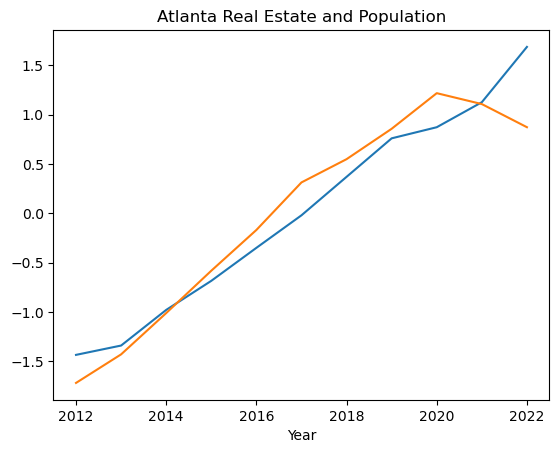

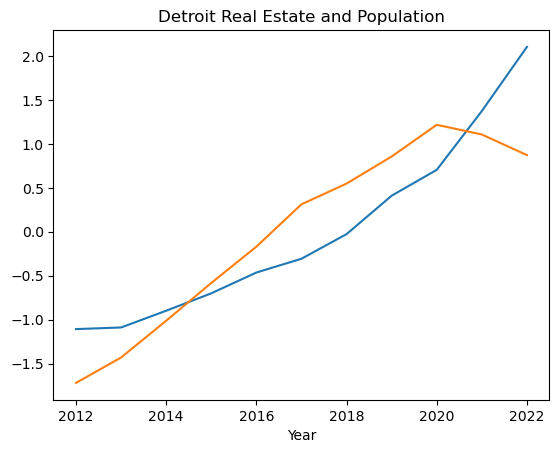

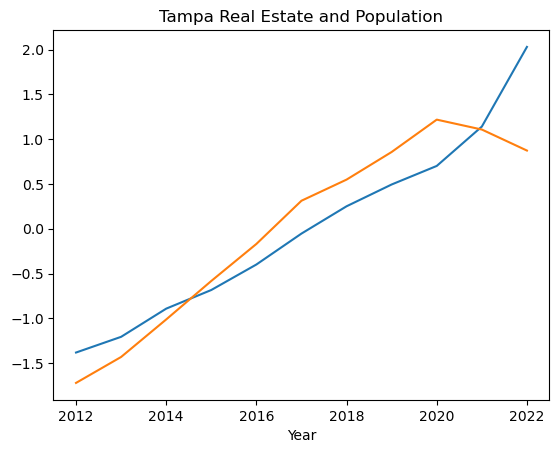

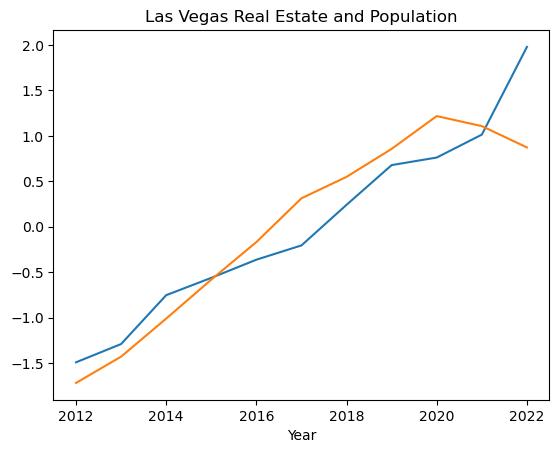

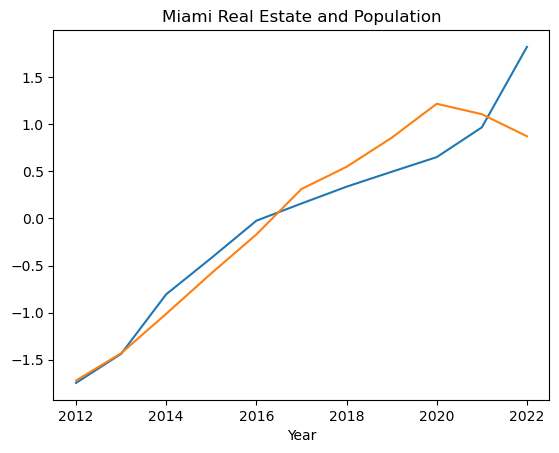

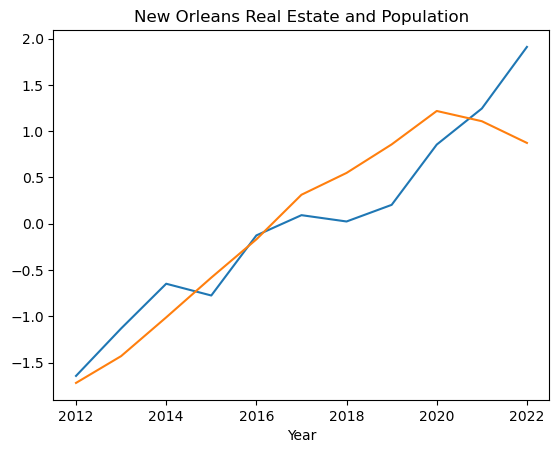

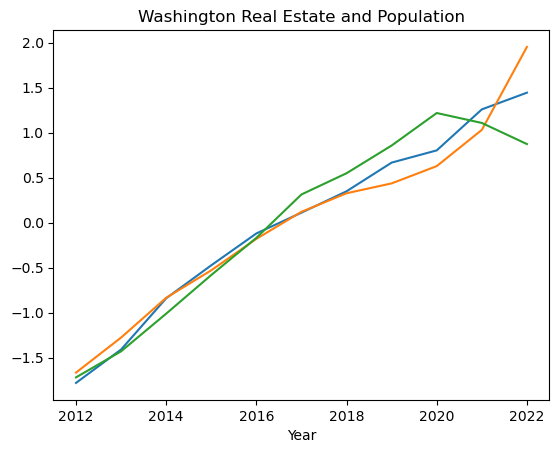

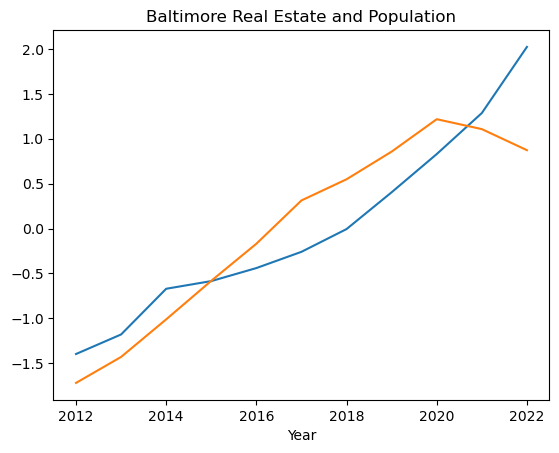

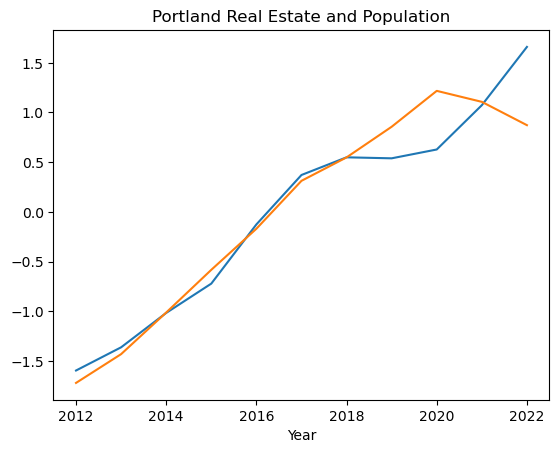

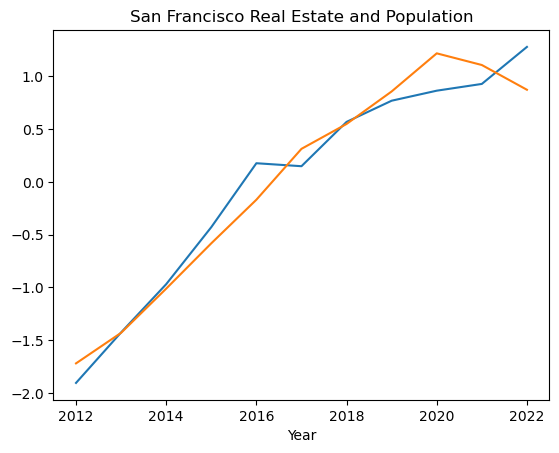

In [35]:
#create line graph for each city
for city in cities:
    x=0
    #create a graph for each city with the year, real estate price and crime number          
    plt.plot(population_vs_real_estate.index, population_vs_real_estate[city], label = "Real Estate Prices")
    plt.plot(population_vs_real_estate.index, population_vs_real_estate[city_pop_list[x]], label = "Population")
    x += 0
    #format the plot
    plt.legend
    plt.title(f'{city} Real Estate and Population')
    plt.xlabel('Year')
    plt.show()